**Exercise 2: Edge detection**

*CPSC 480/580: Computer Vision*

*Yale University*

*Instructor: Alex Wong*


**Prerequisites**:

1. Enable Google Colaboratory as an app on your Google Drive account

2. Create a new Google Colab notebook, this will also create a "Colab Notebooks" directory under "MyDrive" i.e.
```
/content/drive/MyDrive/Colab Notebooks
```

3. Create the following directory structure in your Google Drive
```
/content/drive/MyDrive/Colab Notebooks/CPSC 480-580: Computer Vision/Exercises
```

4. Move the 02_exercise.ipynb into
```
/content/drive/MyDrive/Colab Notebooks/CPSC 480-580: Computer Vision/Exercises
```
so that its absolute path is
```
/content/drive/MyDrive/Colab Notebooks/CPSC 480-580: Computer Vision/Exercises/02_exercise.ipynb
```

In this exercise, we will introduce common edge detectors. We will start consider 3 version of the same image: original, noisy, and smoothed. The outcomes of each edge detection will illustrate the need for (Gaussian) smoothing, and the behavior and failure modes of each method


**Submission**:

1. Implement all TODOs in the code blocks below.

2. Run the Colab Notebook to produce results for each code block.

3. List any collaborators.

```
Collaborators: Doe, Jane (Please write names in <Last Name, First Name> format)

Collaboration details: Discussed ... implementation details with Jane Doe.
```

Import packages

In [2]:
import skimage as ski, scipy
import skimage.filters
import numpy as np
import matplotlib.pyplot as plt

Utility functions for plotting

In [3]:
def config_plot(ax):
    '''
    Function to remove axis tickers and box around figure
    '''

    # TODO: Implement axis tickers and box removal
    if isinstance(ax, (list, tuple, np.ndarray)):
        for a in ax:
            a.axis('off')
    else:
        ax.axis('off')

Loading data

In [4]:
# TODO: Load astronaunt image from skimage
image = ski.data.astronaut()

# TODO: Create a grayscale version of the image if it isn't already
image_gray = ski.color.rgb2gray(image)

# TODO: Add random Gaussian noise with variance of 0.005 to simulate noisy capture
image_noisy = ski.util.random_noise(image_gray, mode='gaussian', var=0.005)

# TODO: Smooth noise with Gaussian filter with sigma of 3
image_smooth = ski.filters.gaussian(image_gray, sigma=3)

Roberts edge detector

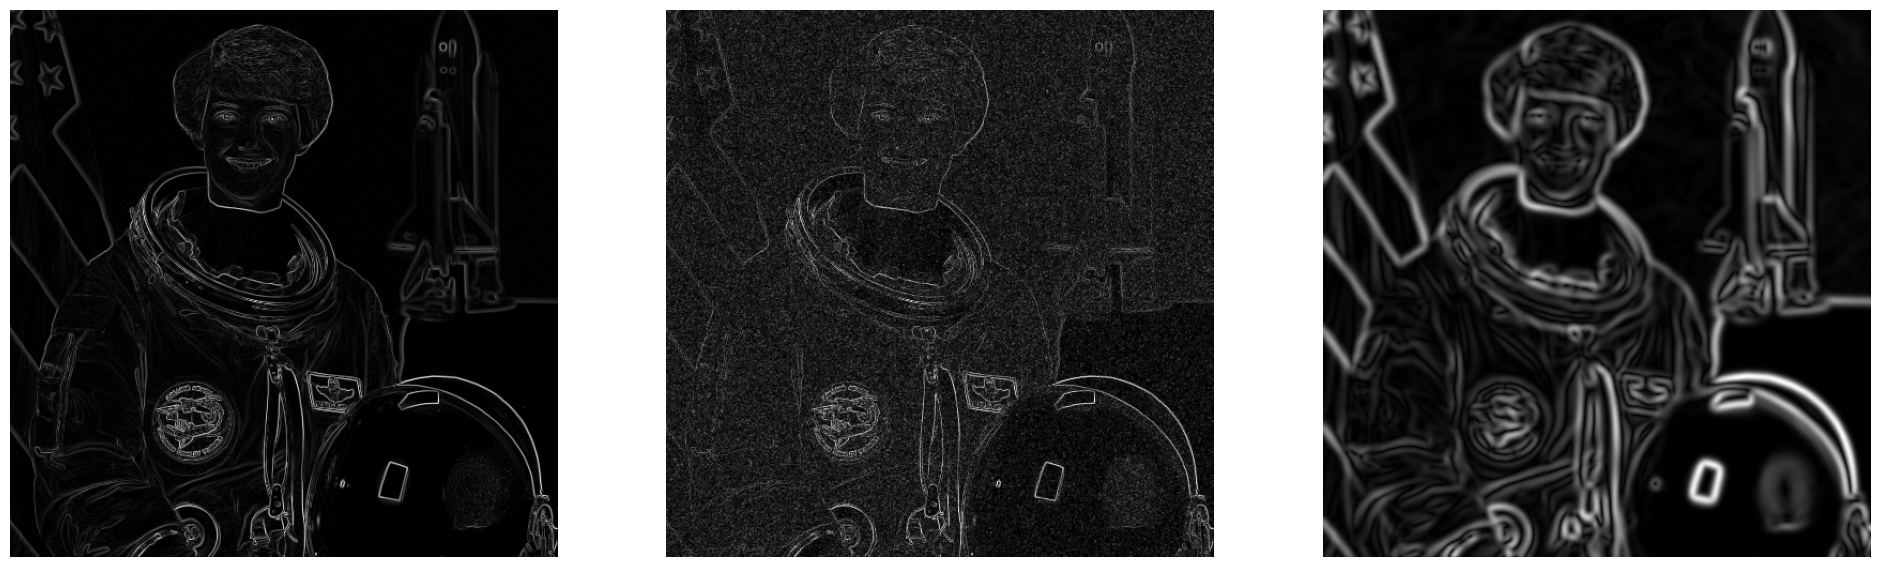

In [5]:
# TODO: Run Roberts edge detector from skimage filters on gray, noisy, and smoothed images
edges_roberts_gray = skimage.filters.roberts(image_gray)
edges_roberts_noisy = skimage.filters.roberts(image_noisy)
edges_roberts_smooth = skimage.filters.roberts(image_smooth)

# Create visualization with 'gray' cmap
fig, plts = plt.subplots(1, 3, figsize=(24, 32))
ax = plts[0].imshow(edges_roberts_gray, cmap='gray')
ax = plts[1].imshow(edges_roberts_noisy, cmap='gray')
ax = plts[2].imshow(edges_roberts_smooth, cmap='gray')
config_plot(plts.flatten())
plt.show()

Prewitt edge detector

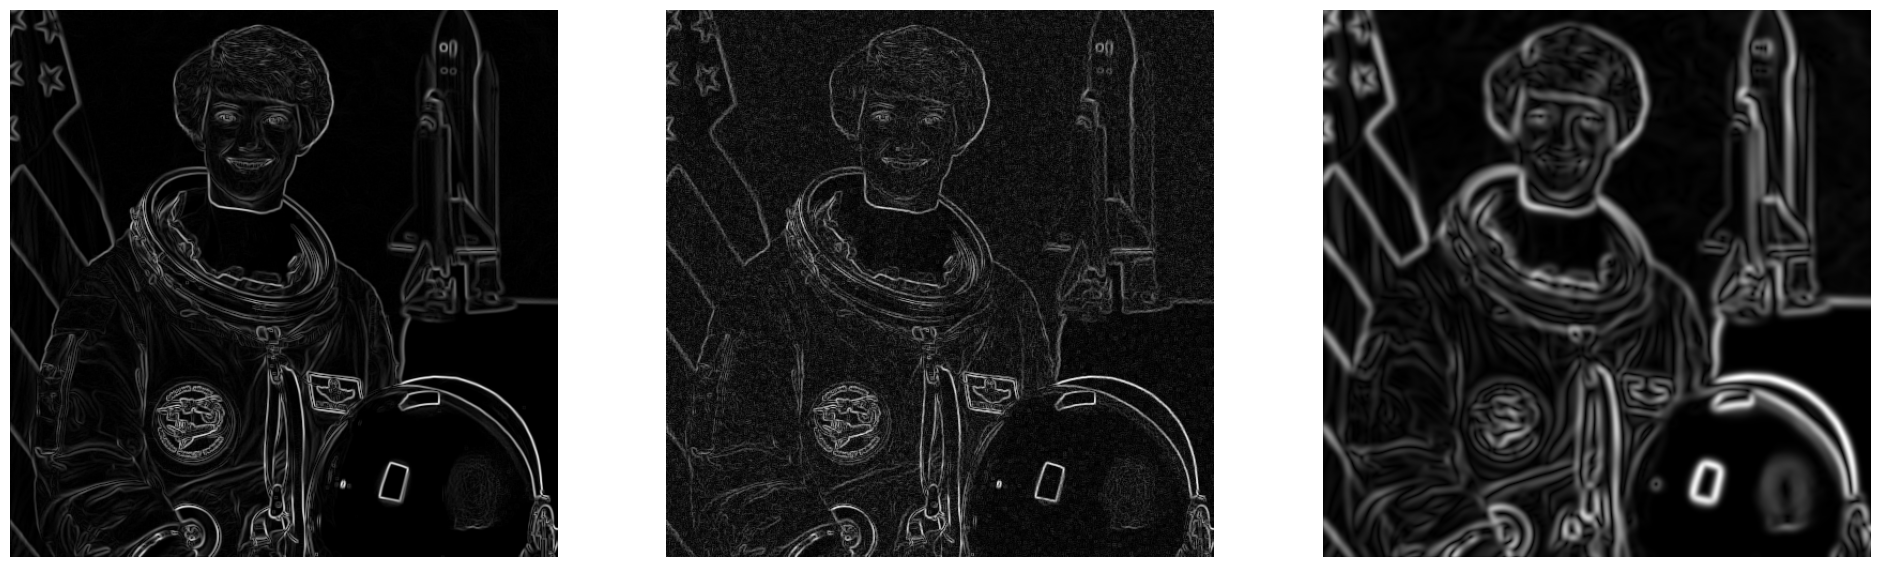

In [6]:
# TODO: Run Prewitt edge detector from skimage filters on gray, noisy, and smoothed images
edges_prewitt_gray = ski.filters.prewitt(image_gray)
edges_prewitt_noisy = ski.filters.prewitt(image_noisy)
edges_prewitt_smooth = ski.filters.prewitt(image_smooth)

# Create visualization with 'gray' cmap
fig, plts = plt.subplots(1, 3, figsize=(24, 32))
plts[0].imshow(edges_prewitt_gray, cmap='gray')
plts[1].imshow(edges_prewitt_noisy, cmap='gray')
plts[2].imshow(edges_prewitt_smooth, cmap='gray')
config_plot(plts.flatten())
plt.show()

Sobel edge detector

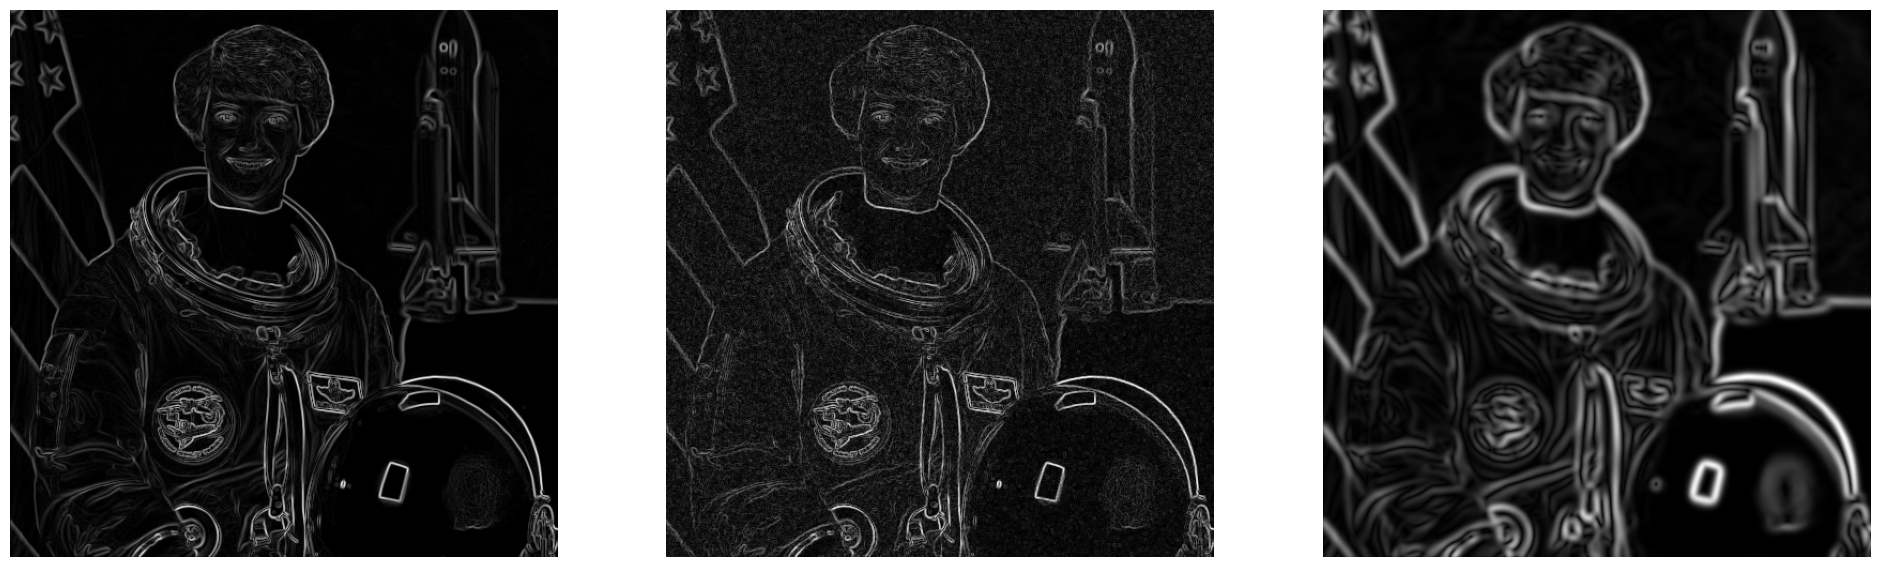

In [7]:
# TODO: Run sobel edge detector from skimage filters on gray, noisy, and smoothed images
edges_sobel_gray = ski.filters.sobel(image_gray)
edges_sobel_noisy = ski.filters.sobel(image_noisy)
edges_sobel_smooth = ski.filters.sobel(image_smooth)

# Create visualization with 'gray' cmap
fig, plts = plt.subplots(1, 3, figsize=(24, 32))
plts[0].imshow(edges_sobel_gray, cmap='gray')
plts[1].imshow(edges_sobel_noisy, cmap='gray')
plts[2].imshow(edges_sobel_smooth, cmap='gray')
config_plot(plts.flatten())
plt.show()

Laplace edge detector

In [8]:
def find_zero_crossing(image):
    '''
    Finds zero crossings in an image

    Arg(s):
        image : numpy[float32]
            H x W monochrome image
    Returns:
        numpy[float32] : H x W binary edge map
    '''

    # TODO: Compute the sign of the image
    image_sign = np.sign(image)
    # print(image_sign)

    # TODO: Find the max and min for each 2 x 2 region in the sign image
    image_max = scipy.ndimage.maximum_filter(image_sign, size=2)
    image_min = scipy.ndimage.minimum_filter(image_sign, size=2)

    # TODO: Find zero crossings
    zero_crossing = (image_max != image_min) # coordinates
    edges = np.zeros_like(image, dtype=np.float32)
    edges[zero_crossing] = 1

    return zero_crossing

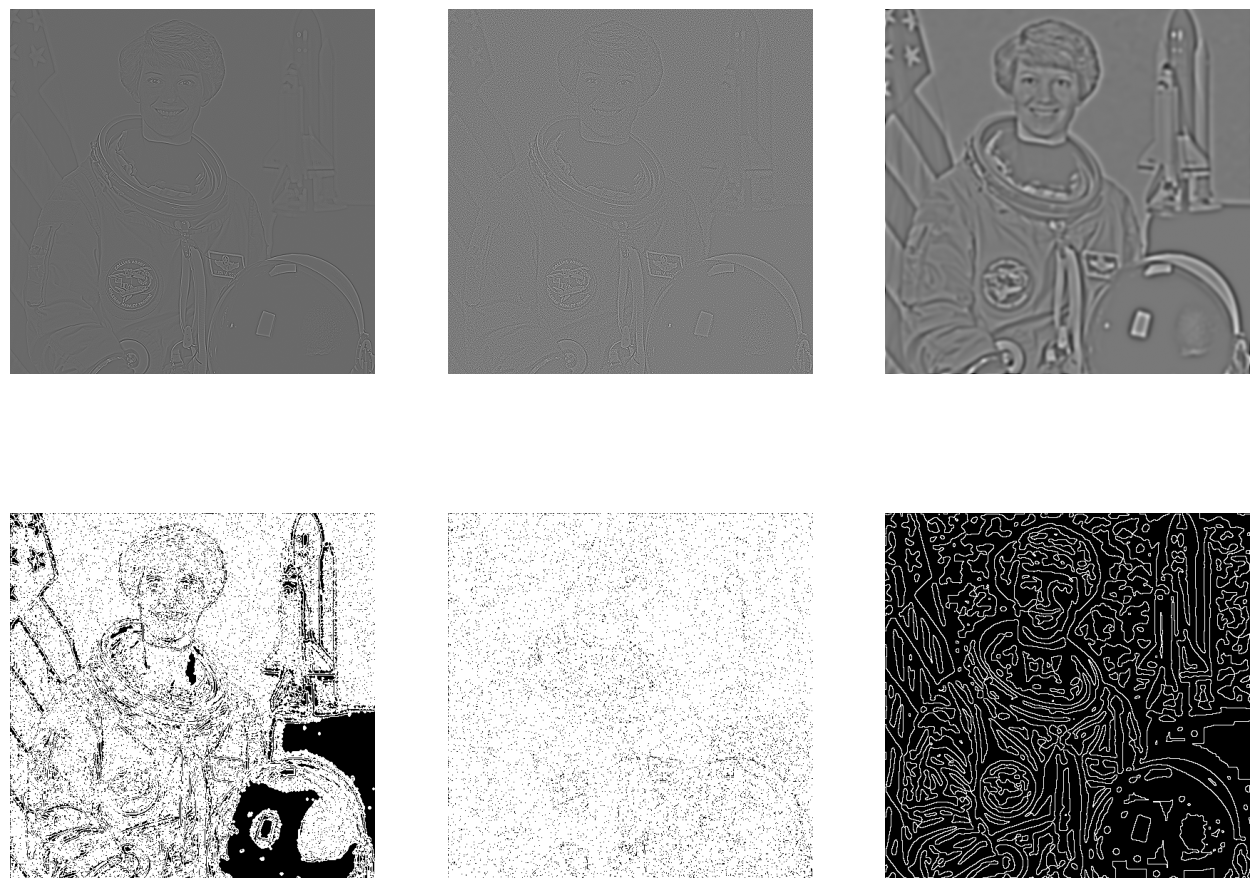

In [9]:
# TODO: Run 3x3 Laplace detector from skimage filters on gray, noisy, and smoothed images
laplace_gray = ski.filters.laplace(image_gray)
# print(laplace_gray.shape)
laplace_noisy = ski.filters.laplace(image_noisy)
laplace_smooth = ski.filters.laplace(image_smooth)

edges_laplace_gray = find_zero_crossing(laplace_gray)
edges_laplace_noisy = find_zero_crossing(laplace_noisy)
edges_laplace_smooth = find_zero_crossing(laplace_smooth)

# Create visualization
fig, plts = plt.subplots(2, 3, figsize=(16, 12))
plts[0][0].imshow(laplace_gray, cmap='gray')
plts[0][1].imshow(laplace_noisy, cmap='gray')
plts[0][2].imshow(laplace_smooth, cmap='gray')

plts[1][0].imshow(edges_laplace_gray, cmap='gray')
plts[1][1].imshow(edges_laplace_noisy, cmap='gray')
plts[1][2].imshow(edges_laplace_smooth, cmap='gray')
config_plot(plts.flatten())
plt.show()


Canny edge detector

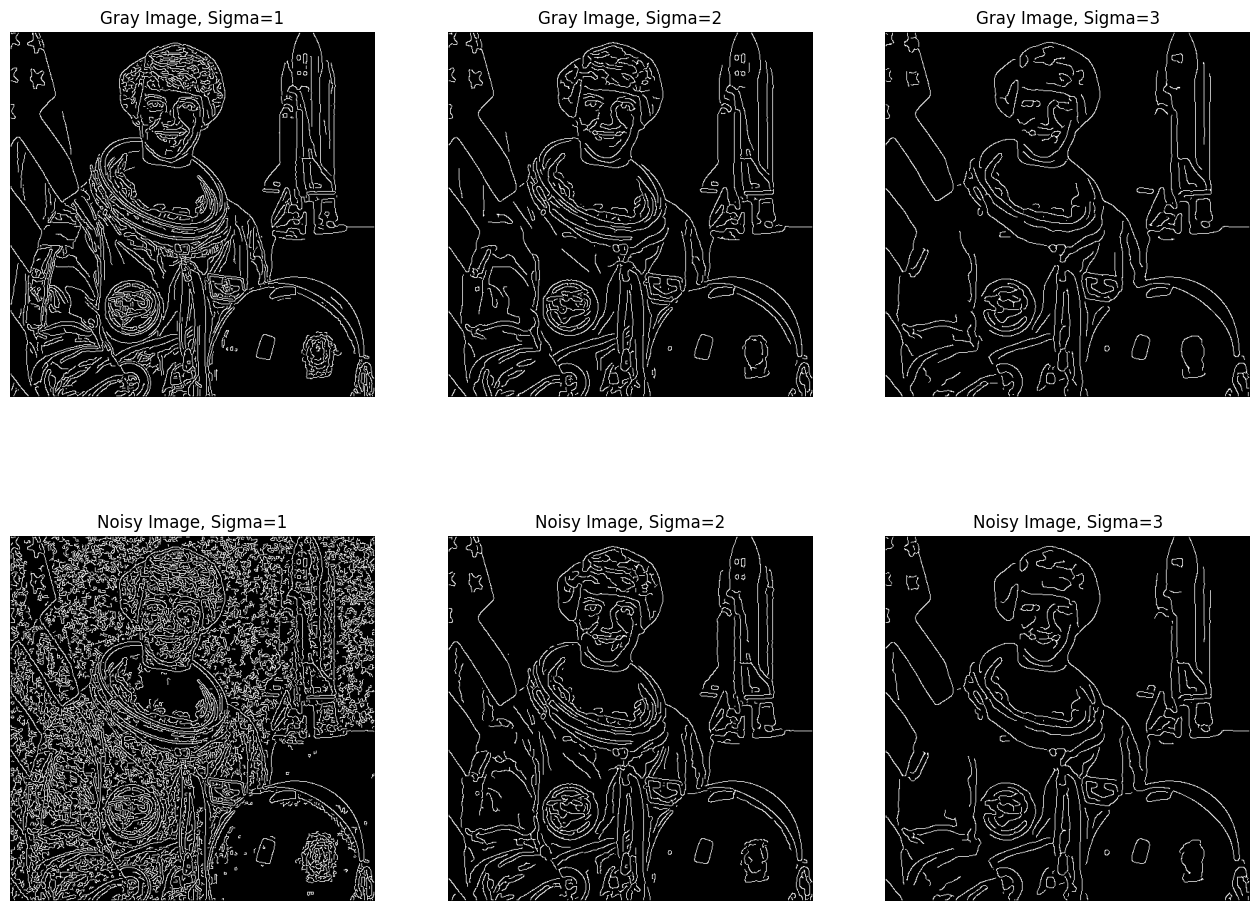

In [10]:
# TODO: Run Canny edge detector on skimage filters on gray and noisy images each with sigma 1, 2, 3
edges_canny_gray_sigma1 = ski.feature.canny(image_gray, sigma=1)
edges_canny_gray_sigma2 = ski.feature.canny(image_gray, sigma=2)
edges_canny_gray_sigma3 = ski.feature.canny(image_gray, sigma=3)
edges_canny_noisy_sigma1 = ski.feature.canny(image_noisy, sigma=1)
edges_canny_noisy_sigma2 = ski.feature.canny(image_noisy, sigma=2)
edges_canny_noisy_sigma3 = ski.feature.canny(image_noisy, sigma=3)

# Create visualization with 'gray' cmap
fig, plts = plt.subplots(2, 3, figsize=(16, 12))

plts[0][0].imshow(edges_canny_gray_sigma1, cmap='gray')
plts[0][0].set_title('Gray Image, Sigma=1')
plts[0][1].imshow(edges_canny_gray_sigma2, cmap='gray')
plts[0][1].set_title('Gray Image, Sigma=2')
plts[0][2].imshow(edges_canny_gray_sigma3, cmap='gray')
plts[0][2].set_title('Gray Image, Sigma=3')

plts[1][0].imshow(edges_canny_noisy_sigma1, cmap='gray')
plts[1][0].set_title('Noisy Image, Sigma=1')
plts[1][1].imshow(edges_canny_noisy_sigma2, cmap='gray')
plts[1][1].set_title('Noisy Image, Sigma=2')
plts[1][2].imshow(edges_canny_noisy_sigma3, cmap='gray')
plts[1][2].set_title('Noisy Image, Sigma=3')

config_plot(plts.flatten())
plt.show()